In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
chunk_size = 3600

In [4]:
df = pd.read_csv("csv/4 July 24.csv")
df = df[ (df["k (veh/NM) for a given time"] <= 30).any() | df['k (veh/NM) for a given time'].isna() ]
# Filter out the last chunk if it's smaller than the chunk size
n_chunks = len(df) // chunk_size
df = df.iloc[:n_chunks * chunk_size]

In [5]:
df2 = pd.read_csv('csv/5 July.csv')
df2 = df2[ (df2["k (veh/NM) for a given time"] <= 30).any() | df2['k (veh/NM) for a given time'].isna() ]

df = pd.concat([df, df2], ignore_index=True)

# Filter out the last chunk if it's smaller than the chunk size
n_chunks = len(df) // chunk_size
df = df.iloc[:n_chunks * chunk_size]

In [6]:
df2 = pd.read_csv('csv/6 July .csv')
df2 = df2[ (df2["k (veh/NM) for a given time"] <= 30).any() | df2['k (veh/NM) for a given time'].isna() ]
df = pd.concat([df, df2], ignore_index=True)


# Filter out the last chunk if it's smaller than the chunk size
n_chunks = len(df) // chunk_size
df = df.iloc[:n_chunks * chunk_size]

In [7]:
df2 = pd.read_csv('csv/1 July 1st half.csv')
df2 = df2[ (df2["k (veh/NM) for a given time"] <= 30).any() | df2['k (veh/NM) for a given time'].isna() ]
df = pd.concat([df, df2], ignore_index=True)

# Filter out the last chunk if it's smaller than the chunk size
n_chunks = len(df) // chunk_size
df = df.iloc[:n_chunks * chunk_size]

In [8]:
df2 = pd.read_csv('csv/1 July 2nd half.csv')
df2 = df2[ (df2["k (veh/NM) for a given time"] <= 30).any() | df2['k (veh/NM) for a given time'].isna() ]
df = pd.concat([df, df2], ignore_index=True)

# Filter out the last chunk if it's smaller than the chunk size
n_chunks = len(df) // chunk_size
df = df.iloc[:n_chunks * chunk_size]

In [9]:
df2 = pd.read_csv('csv/my_data832.csv')
df2 = df2[ (df2["k (veh/NM) for a given time"] <= 30).any() | df2['k (veh/NM) for a given time'].isna() ]
df = pd.concat([df, df2], ignore_index=True)

# Filter out the last chunk if it's smaller than the chunk size
n_chunks = len(df) // chunk_size
df = df.iloc[:n_chunks * chunk_size]

In [10]:
qe_per_half_an_hour = df["qe (veh/h)"].groupby(df.index // chunk_size).last()-df["qe (veh/h)"].groupby(df.index // chunk_size).first()+1 
ql_per_half_an_hour = df["ql (veh/h)"].groupby(df.index // chunk_size).last()-df["ql (veh/h)"].groupby(df.index // chunk_size).first()+1 

In [11]:
# Filter the DataFrame
df = df[((df["k (veh/NM) for a given time"] <= 35) & (df["k (veh/NM) for a given time"] >= 10)) | df['k (veh/NM) for a given time'].isna()]


In [12]:
df = df[((df["u (kt or km/h) for each vessel"] > 0) & (df["u (kt or km/h) for each vessel"] <20))| df["u (kt or km/h) for each vessel"].isna()]
df


,Time (sec),u (kt or km/h) for each vessel,k (veh/NM) for a given time,ql (veh/h),qe (veh/h)
2,2.0,NaN,12.0,NaN,NaN
5,5.0,NaN,12.0,NaN,NaN
11,11.0,NaN,12.0,NaN,NaN
13,13.0,NaN,12.0,NaN,NaN
14,14.0,NaN,12.0,NaN,NaN
...,...,...,...,...,...
233995,44450.0,NaN,12.0,NaN,NaN
233996,44451.0,NaN,16.0,NaN,NaN
233997,44452.0,NaN,16.0,NaN,NaN
233998,44453.0,NaN,19.0,NaN,NaN


Line equation: u = -0.0645k + 9.2552
143.40221223654655


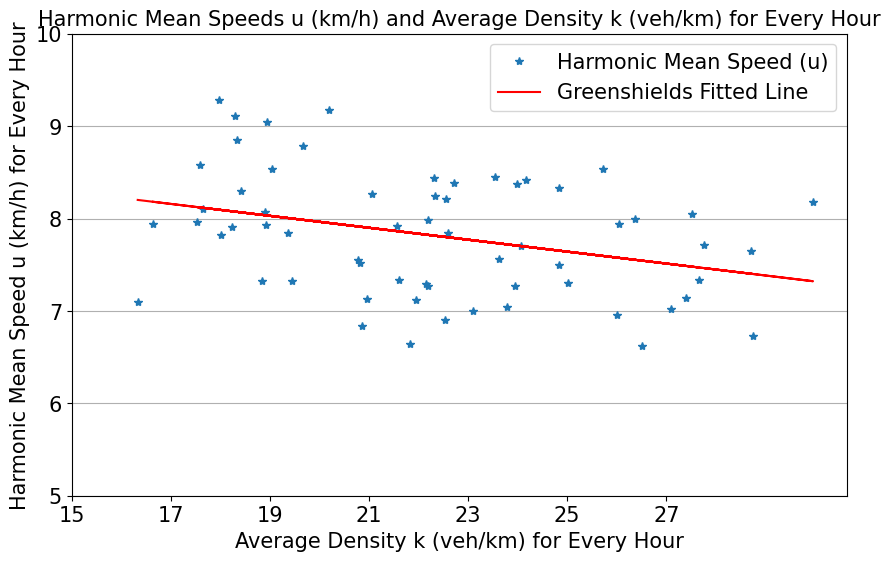

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import hmean
from scipy.stats import hmean
from sklearn.linear_model import LinearRegression
# Assuming df is your DataFrame

# Function to calculate harmonic mean for each chunk
def harmonic_mean_chunk(chunk):
    # Ensure no zero or negative values (harmonic mean is undefined for non-positive numbers)
    chunk = chunk[chunk > 0]
    return hmean(chunk)

# Filter out the last chunk if it's smaller than the chunk size
n_chunks = len(df) // chunk_size
df = df.iloc[:n_chunks * chunk_size]
# Calculate harmonic mean speeds, ignoring NaN values
harmonic_mean_speeds = df['u (kt or km/h) for each vessel'].groupby(df.index // chunk_size).apply(harmonic_mean_chunk)
#harmonic_mean_speeds = df['u (kt or km/h) for each vessel'].groupby(df.index // 1800).mean()
average_K = (df["k (veh/NM) for a given time"]).groupby(df.index // chunk_size).mean()

# Drop NaN values for linear regression
valid_indices = (harmonic_mean_speeds >= 6.5) & (~np.isnan(harmonic_mean_speeds))

# Reshape for sklearn LinearRegression
X = average_K[valid_indices].values.reshape(-1, 1)
y = harmonic_mean_speeds[valid_indices].values

# Fit linear regression model
reg = LinearRegression().fit(X, y)
line_fit = reg.predict(X)
# Extract slope (m) and intercept (b)
m = reg.coef_[0]
b = reg.intercept_
print(f"Line equation: u = {m:.4f}k + {b:.4f}")
print(-b/m)
# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed

# Plot harmonic_mean_speeds on the primary y-axis (left)
ax1.plot(average_K[valid_indices], harmonic_mean_speeds[valid_indices], '*', label='Harmonic Mean Speed (u)')

# Plot the fitted line
ax1.plot(average_K[valid_indices], line_fit, '-', color='red', label='Greenshields Fitted Line')

# Add labels and title
plt.title('Harmonic Mean Speeds u (km/h) and Average Density k (veh/km) for Every Hour', fontsize = 15)
ax1.set_xlabel('Average Density k (veh/km) for Every Hour', fontsize = 15)
ax1.set_ylabel('Harmonic Mean Speed u (km/h) for Every Hour', fontsize = 15)

lines1, labels1 = ax1.get_legend_handles_labels()
plt.legend(lines1, labels1, loc='upper right', fontsize = 15)
plt.grid(axis='y')
plt.xticks(np.arange(15, 29, 2), fontsize = 15)
plt.yticks(np.arange(5,11, 1), fontsize = 15)
plt.show() 

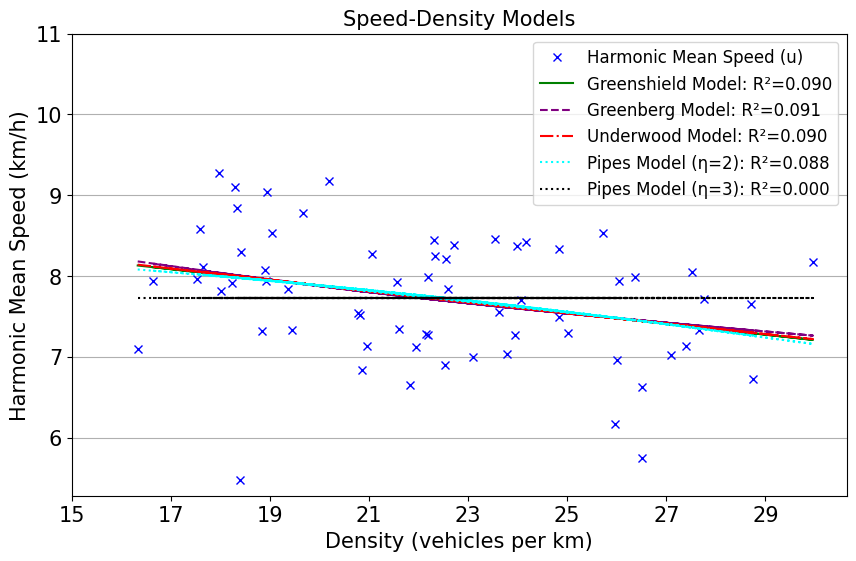

Greenshield Model parameters: v_f=9.23, rho_j=136.64, R²=0.0900
Greenberg Model parameters: v_f=1.51, rho_j=3629.20, R²=0.0907
Underwood Model parameters: v_f=3.46, rho_j=113.48, R²=0.0904
Pipes Model (η=2) parameters: v_f=8.47, rho_j=-76.13, R²=0.0876
Pipes Model (η=3) parameters: v_f=7.72, rho_j=-24573.62, R²=-0.0000


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define parameters for the models
v_f = 8.68  # Free-flow velocity (km/h)
rho_j = 191  # Jam density (vehicles per unit length)
# Define the models
def greenshield_model(density, v_f, rho_j):
    return v_f * (1 - (density / rho_j))

def greenberg_model(density, v_f, rho_j):
    return v_f * np.log(rho_j / density)

def underwood_model(density, v_f, rho_j):
    return v_f * np.exp(1 - density / rho_j)

def pipes_model2(density, v_f, rho_j):
    return v_f * (1 - (density / rho_j)**2)

def pipes_model3(density, v_f, rho_j):
    return v_f * (1 - (density / rho_j)**3)

# Use harmonic_mean_speeds for speed and average_K for density
speed = harmonic_mean_speeds
density = average_K

# Fit models to data
params_gs, _ = curve_fit(greenshield_model, density, speed, p0=[v_f, rho_j], maxfev=2000)
params_gb, _ = curve_fit(greenberg_model, density, speed, p0=[v_f, rho_j], maxfev=2000)
params_uw, _ = curve_fit(underwood_model, density, speed, p0=[v_f, rho_j], maxfev=2000)
params_ps2, _ = curve_fit(pipes_model2, density, speed, p0=[v_f, rho_j], maxfev=2000)
params_ps3, _ = curve_fit(pipes_model3, density, speed, p0=[v_f, rho_j], maxfev=2000)

# Calculate fitted values
gs_fit = greenshield_model(density, *params_gs)
gb_fit = greenberg_model(density, *params_gb)
uw_fit = underwood_model(density, *params_uw)
ps2_fit = pipes_model2(density, *params_ps2)
ps3_fit = pipes_model3(density, *params_ps3)

# Calculate R^2 values
def calculate_r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r_squared_gs = calculate_r_squared(speed, gs_fit)
r_squared_gb = calculate_r_squared(speed, gb_fit)
r_squared_uw = calculate_r_squared(speed, uw_fit)
r_squared_ps2 = calculate_r_squared(speed, ps2_fit)
r_squared_ps3 = calculate_r_squared(speed, ps3_fit)

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot data points
ax1.plot(density, speed, 'x', label='Harmonic Mean Speed (u)', color='blue')

# Plot model predictions
ax1.plot(density, gs_fit, label=f'Greenshield Model: R²={r_squared_gs:.3f}', linestyle='-', color='green')
ax1.plot(density, gb_fit, label=f'Greenberg Model: R²={r_squared_gb:.3f}', linestyle='--', color='purple')
ax1.plot(density, uw_fit, label=f'Underwood Model: R²={r_squared_uw:.3f}', linestyle='-.', color='red')
ax1.plot(density, ps2_fit, label=f'Pipes Model (η=2): R²={r_squared_ps2:.3f}', linestyle=':', color='cyan')
ax1.plot(density, ps3_fit, label=f'Pipes Model (η=3): R²={-r_squared_ps3:.3f}', linestyle=':', color='black')

# Add labels and title
plt.title('Speed-Density Models', fontsize=15)
ax1.set_xlabel('Density (vehicles per km)', fontsize=15)
ax1.set_ylabel('Harmonic Mean Speed (km/h)', fontsize=15)
plt.xticks(np.arange(15, 30, 2), fontsize=15)
plt.yticks(np.arange(6, 12, 1), fontsize=15)

# Add legend
plt.legend(fontsize=12)

plt.grid(axis='y')
plt.show()

# Print the fitted parameters
print(f'Greenshield Model parameters: v_f={params_gs[0]:.2f}, rho_j={params_gs[1]:.2f}, R²={r_squared_gs:.4f}')
print(f'Greenberg Model parameters: v_f={params_gb[0]:.2f}, rho_j={params_gb[1]:.2f}, R²={r_squared_gb:.4f}')
print(f'Underwood Model parameters: v_f={params_uw[0]:.2f}, rho_j={params_uw[1]:.2f}, R²={r_squared_uw:.4f}')
print(f'Pipes Model (η=2) parameters: v_f={params_ps2[0]:.2f}, rho_j={params_ps2[1]:.2f}, R²={r_squared_ps2:.4f}')
print(f'Pipes Model (η=3) parameters: v_f={params_ps3[0]:.2f}, rho_j={params_ps3[1]:.2f}, R²={r_squared_ps3:.4f}')


In [156]:
correlation = harmonic_mean_speeds.corr(average_K)
correlation

-0.3000819018533102

In [ ]:
qe_4th_july = [15,57-15,96-57,145-96,187-145,223-187,275-223,335-275,381-335,421-381,468-421,508-468,554-508,594-554,624-594,668-624,711-668,
               757-711,808-757,855-808,895-855,940-895,973-940,1012-973]
ql_4th_july = [27, 78-27,139-78,205-139, 258-205,296-258,349-296,408-349,454-408,501-454, 549-501,592-549,629-592,682-629,717-682,757-717,794-757,
               843-794,907-843,954-907,1008-954,1049-1008,1088-1049,1136-1088]

In [ ]:
correlation = harmonic_mean_speeds.corr(average_K)
correlation

In [ ]:
average_K

C:\Users\Samiul Basir\AppData\Local\Temp\ipykernel_18108\2179855604.py:34: OptimizeWarning: Covariance of the parameters could not be estimated
  params_ps3, _ = curve_fit(pipes_model3, average_K*mult, total_traffic_flow, p0=[v_f, rho_j], maxfev=2000)


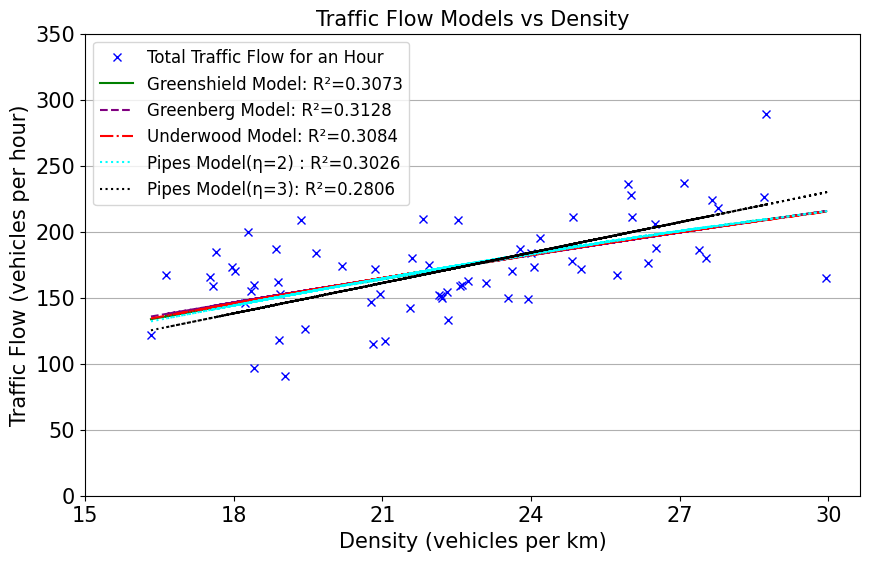

Greenshield Model parameters: v_f=9.39, rho_j=128.20, R²=0.3073
Greenberg Model parameters: v_f=1.84, rho_j=1508.94, R²=0.3128
Underwood Model parameters: v_f=3.56, rho_j=100.68, R²=0.3084
Pipes Model(η=2) parameters: v_f=8.47, rho_j=77.16, R²=0.3026
Pipes Model(η=3) parameters: v_f=7.67, rho_j=102895.22, R²=0.2806


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
mult = 1
# Define parameters for the models
v_f = 9  # Free-flow velocity (vehicles per unit time)
rho_j = 410  # Jam density (vehicles per unit length)
density = np.linspace(0, 300, 20)
# Define the models
def greenshield_model(density, v_f, rho_j):
    return v_f * (1 - (density / rho_j)) * density

def greenberg_model(density, v_f, rho_j):
    return v_f * density * np.log(rho_j / density)

def underwood_model(density, v_f, rho_j):
    return v_f * density * np.exp(1 - density / rho_j)

def pipes_model2(density, v_f, rho_j):
    return v_f * density * (1 - (density / rho_j)**2)

def pipes_model3(density, v_f, rho_j):
    return v_f * density * (1 - (density / rho_j)**3)


# Combine qe_per_half_an_hour and ql_per_half_an_hour for total traffic flow
total_traffic_flow = qe_per_half_an_hour + ql_per_half_an_hour

# Fit models to data
params_gs, _ = curve_fit(greenshield_model, average_K*mult, total_traffic_flow, p0=[v_f, rho_j], maxfev=2000)
params_gb, _ = curve_fit(greenberg_model, average_K*mult, total_traffic_flow, p0=[v_f, rho_j], maxfev=2000)
params_uw, _ = curve_fit(underwood_model, average_K*mult, total_traffic_flow, p0=[v_f, rho_j], maxfev=2000)
params_ps2, _ = curve_fit(pipes_model2, average_K*mult, total_traffic_flow, p0=[v_f, rho_j], maxfev=2000)
params_ps3, _ = curve_fit(pipes_model3, average_K*mult, total_traffic_flow, p0=[v_f, rho_j], maxfev=2000)

# Calculate fitted values
gs_fit = greenshield_model(average_K*mult, *params_gs)
gb_fit = greenberg_model(average_K*mult, *params_gb)
uw_fit = underwood_model(average_K*mult, *params_uw)
ps2_fit = pipes_model2(average_K*mult, *params_ps2)
ps3_fit = pipes_model3(average_K*mult, *params_ps3)

# Calculate R^2 values
def calculate_r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r_squared_gs = calculate_r_squared(total_traffic_flow, gs_fit)
r_squared_gb = calculate_r_squared(total_traffic_flow, gb_fit)
r_squared_uw = calculate_r_squared(total_traffic_flow, uw_fit)
r_squared_ps2 = calculate_r_squared(total_traffic_flow, ps2_fit)
r_squared_ps3 = calculate_r_squared(total_traffic_flow, ps3_fit)

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot data points
ax1.plot(average_K*mult, total_traffic_flow, 'x', label='Total Traffic Flow for an Hour', color='blue')

# Plot model predictions
ax1.plot(average_K*mult, gs_fit, label=f'Greenshield Model: R²={r_squared_gs:.4f}', linestyle='-', color='green')
ax1.plot(average_K*mult, gb_fit, label=f'Greenberg Model: R²={r_squared_gb:.4f}', linestyle='--', color='purple')
ax1.plot(average_K*mult, uw_fit, label=f'Underwood Model: R²={r_squared_uw:.4f}', linestyle='-.', color='red')
ax1.plot(average_K*mult, ps2_fit, label=f'Pipes Model(η=2) : R²={r_squared_ps2:.4f}', linestyle=':', color='cyan')
ax1.plot(average_K*mult, ps3_fit, label=f'Pipes Model(η=3): R²={r_squared_ps3:.4f}', linestyle=':', color='black')

# Add labels and title
plt.title('Traffic Flow Models vs Density', fontsize=15)
ax1.set_xlabel('Density (vehicles per km)', fontsize=15)
ax1.set_ylabel('Traffic Flow (vehicles per hour)', fontsize=15)
plt.xticks(np.arange(15, 31, 3), fontsize=15)
plt.yticks(np.arange(0, 351, 50), fontsize=15)

# Add legend
plt.legend(fontsize=12)

plt.grid(axis='y')
plt.show()

# Print the fitted parameters
print(f'Greenshield Model parameters: v_f={params_gs[0]:.2f}, rho_j={params_gs[1]:.2f}, R²={r_squared_gs:.4f}')
print(f'Greenberg Model parameters: v_f={params_gb[0]:.2f}, rho_j={params_gb[1]:.2f}, R²={r_squared_gb:.4f}')
print(f'Underwood Model parameters: v_f={params_uw[0]:.2f}, rho_j={params_uw[1]:.2f}, R²={r_squared_uw:.4f}')
print(f'Pipes Model(η=2) parameters: v_f={params_ps2[0]:.2f}, rho_j={params_ps2[1]:.2f}, R²={r_squared_ps2:.4f}')
print(f'Pipes Model(η=3) parameters: v_f={params_ps3[0]:.2f}, rho_j={params_ps3[1]:.2f}, R²={r_squared_ps3:.4f}')


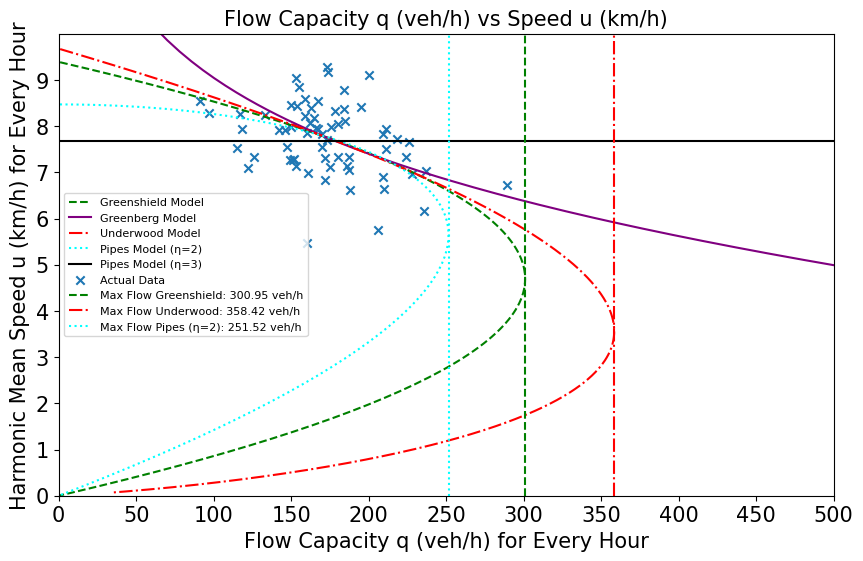

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load your data
# Assuming you have your data in numpy arrays:
# Replace 'harmonic_mean_speeds' and 'qe_per_half_an_hour + ql_per_half_an_hour' with your actual data arrays
x = qe_per_half_an_hour + ql_per_half_an_hour
y = harmonic_mean_speeds

fig, ax1 = plt.subplots(figsize=(10, 6))

# Define the polynomial function for curve fitting
def polynomial(y, b, c, d):
    return b * y**2 + c * y + d

# Fit the polynomial to the data
popt, pcov = curve_fit(polynomial, y, x)

# Generate fitted values for the fitted polynomial
y_fit = np.linspace(min(y), max(y), 100)
x_fit = polynomial(y_fit, *popt)

# Define the equations
def greenshield_u(k, v_f, rho_j):
    return v_f * (1 - (k / rho_j))

def greenshield_q(k, v_f, rho_j):
    return k * greenshield_u(k, v_f, rho_j)

def greenberg_u(k, v_f, rho_j):
    return v_f * np.log(rho_j / k)

def greenberg_q(k, v_f, rho_j):
    return k * greenberg_u(k, v_f, rho_j)

def underwood_u(k, v_f, rho_j):
    return v_f * np.exp(1 - k / rho_j)

def underwood_q(k, v_f, rho_j):
    return k * underwood_u(k, v_f, rho_j)

def pipes_u2(k, v_f, rho_j):
    return v_f * (1 - (k / rho_j)**2)

def pipes_q2(k, v_f, rho_j):
    return k * pipes_u2(k, v_f, rho_j)

def pipes_u3(k, v_f, rho_j):
    return v_f * (1 - (k / rho_j)**3)

def pipes_q3(k, v_f, rho_j):
    return k * pipes_u3(k, v_f, rho_j)

params = {
    'Greenshield': (9.39, 128.20),
    'Greenberg': (1.84, 1508.94),
    'Underwood': (3.56, 100.68),
    'Pipes (η=2)': (8.47, 77.16),
    'Pipes (η=3)': (7.67, 102895.22)
}

# Generate k values
k_values = np.linspace(0.1, 500, 500)  # Adjust the range as needed, start from 0.1 to avoid log(0) issues

# Calculate u and q values for each model
greenshield_u_values = greenshield_u(k_values, *params['Greenshield'])
greenshield_q_values = greenshield_q(k_values, *params['Greenshield'])

greenberg_u_values = greenberg_u(k_values, *params['Greenberg'])
greenberg_q_values = greenberg_q(k_values, *params['Greenberg'])

underwood_u_values = underwood_u(k_values, *params['Underwood'])
underwood_q_values = underwood_q(k_values, *params['Underwood'])

pipes_u2_values = pipes_u2(k_values, *params['Pipes (η=2)'])
pipes_q2_values = pipes_q2(k_values, *params['Pipes (η=2)'])

pipes_u3_values = pipes_u3(k_values, *params['Pipes (η=3)'])
pipes_q3_values = pipes_q3(k_values, *params['Pipes (η=3)'])

# Find the maximum flow (q_max) and corresponding k values for each model
k_max_greenshield = k_values[np.argmax(greenshield_q_values)]
q_max_greenshield = max(greenshield_q_values)

k_max_underwood = k_values[np.argmax(underwood_q_values)]
q_max_underwood = max(underwood_q_values)

k_max_pipes2 = k_values[np.argmax(pipes_q2_values)]
q_max_pipes2 = max(pipes_q2_values)

# Plot u vs q for all models (already done in your original code)
plt.plot(greenshield_q_values, greenshield_u_values, color='green', linestyle='--', label='Greenshield Model')
plt.plot(greenberg_q_values, greenberg_u_values, color='purple', linestyle='-', label='Greenberg Model')
plt.plot(underwood_q_values, underwood_u_values, color='red', linestyle='-.', label='Underwood Model')
plt.plot(pipes_q2_values, pipes_u2_values, color='cyan', linestyle=':', label='Pipes Model (η=2)')
plt.plot(pipes_q3_values, pipes_u3_values, color='black', linestyle='-', label='Pipes Model (η=3)')

# Plotting the data points
plt.scatter(x, y, label='Actual Data', marker='x')

# Add vertical lines at the maximum flow values
plt.axvline(x=q_max_greenshield, color='green', linestyle='--', label=f'Max Flow Greenshield: {q_max_greenshield:.2f} veh/h')
plt.axvline(x=q_max_underwood, color='red', linestyle='-.', label=f'Max Flow Underwood: {q_max_underwood:.2f} veh/h')
plt.axvline(x=q_max_pipes2, color='cyan', linestyle=':', label=f'Max Flow Pipes (η=2): {q_max_pipes2:.2f} veh/h')

# Set axis ticks and limits to ensure origin at (0, 0)
plt.xticks(np.arange(0, 1000, 50), fontsize=15)
plt.yticks(np.arange(0, 10, 1), fontsize=15)
plt.xlim(0, 500)  # Adjust as necessary
plt.ylim(0, 10)  # Adjust as necessary

# Adding legend, title, and labels
plt.legend(fontsize=8)
plt.title('Flow Capacity q (veh/h) vs Speed u (km/h)', fontsize=15)
ax1.set_xlabel('Flow Capacity q (veh/h) for Every Hour', fontsize=15)
ax1.set_ylabel('Harmonic Mean Speed u (km/h) for Every Hour', fontsize=15)

# Display the plot
plt.show()


C:\Users\Samiul Basir\AppData\Local\Temp\ipykernel_18108\2680612321.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


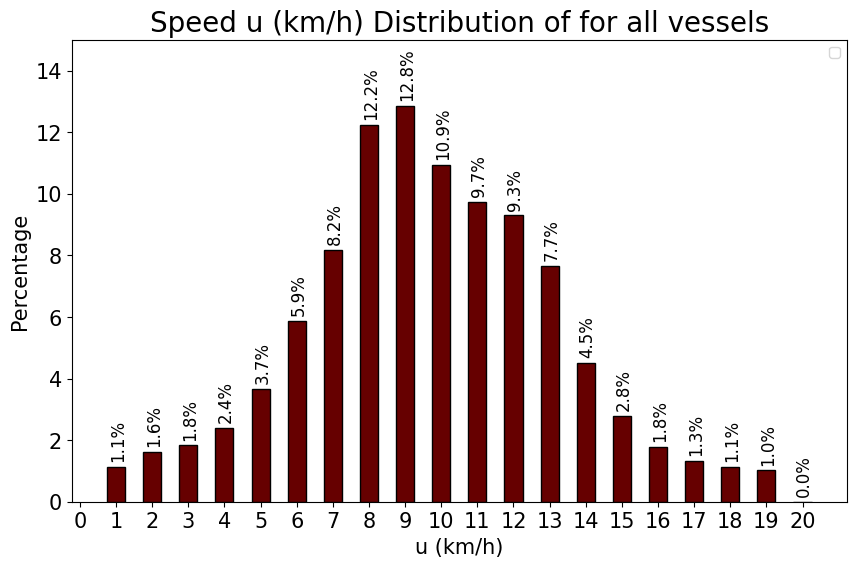

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and 'u (kt or km/h) for each vessel' is the column name
df5= df[(df['u (kt or km/h) for each vessel'] > 0) & (df['u (kt or km/h) for each vessel'] <= 20)]
# Calculate the histogram data
counts, bins = np.histogram(df5["u (kt or km/h) for each vessel"], bins=20, range=(1, 21), density=True)

# Calculate percentages
percentages = counts * 100

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], percentages, width=0.5, edgecolor='black',color = "#660000",  align='center')

# Add value labels on top of each bar
for i, p in enumerate(percentages):
    plt.text(bins[i]-0.2, p+0.3 , f'{p:.1f}%', fontsize = 12, rotation=90)

plt.title('Speed u (km/h) Distribution of for all vessels', fontsize = 20)
plt.xlabel('u (km/h)', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.ylim(0, 15)
plt.xticks(np.arange(0, 21, 1), fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend()
plt.grid(False)
plt.show()


In [ ]:

# Calculate the interquartile range (IQR)
IQR = df5["u (kt or km/h) for each vessel"].quantile(0.75) - df5["u (kt or km/h) for each vessel"].quantile(0.25)

print("Interquartile Range (IQR):", IQR)

In [ ]:
df5["u (kt or km/h) for each vessel"].quantile(0.75)-1.5*4

In [ ]:
df5["u (kt or km/h) for each vessel"].quantile(0.25)+1.5*4



In [ ]:
IQR = df5["u (kt or km/h) for each vessel"].quantile(0.25)
IQR

In [ ]:
qe_per_half_an_hour.max()

In [18]:
(ql_per_half_an_hour+qe_per_half_an_hour).sum()

11213.0